# Build FX Volatility Surface

Construct an FX volatility surface to different terms using ATM volatility, risk reversals and strangles. The example is taken from the book by Iain Clarke (see Tables 3.3 and 3.4 of the book)

In [1]:
from financepy.finutils.FinDate import FinDate
from financepy.market.curves.FinDiscountCurveFlat import *
from financepy.market.volatility.FinFXVolSurface import *

####################################################################
# FINANCEPY BETA Version 0.180 - This build:  22 Sep 2020 at 22:58 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#    For bug reports and comments - allmypythonprojects@gmail.com  #
####################################################################



In [2]:
valueDate = FinDate(10, 4, 2020)

In [3]:
forName = "EUR"
domName = "USD"
currencyPair = forName + domName
spotFXRate = 1.3465

In [4]:
forCCRate = 0.03460  # EUR
domCCRate = 0.02940  # USD

In [5]:
domDiscountCurve = FinDiscountCurveFlat(valueDate, domCCRate)
forDiscountCurve = FinDiscountCurveFlat(valueDate, forCCRate)

In [6]:
tenors = ['1M', '2M', '3M', '6M', '1Y', '2Y']
atmVols = [21.00, 21.00, 20.750, 19.400, 18.250, 17.677]
marketStrangle25DeltaVols = [0.65, 0.75, 0.85, 0.90, 0.95, 0.85]
riskReversal25DeltaVols = [-0.20, -0.25, -0.30, -0.50, -0.60, -0.562]

In [7]:
notionalCurrency = forName

In [8]:
atmMethod = FinFXATMMethod.FWD_DELTA_NEUTRAL
deltaMethod = FinFXDeltaMethod.SPOT_DELTA

In [12]:
fxMarket = FinFXVolSurface(valueDate,
                              spotFXRate,
                              currencyPair,
                              notionalCurrency,
                              domDiscountCurve,
                              forDiscountCurve,
                              tenors,
                              atmVols,
                              marketStrangle25DeltaVols,
                              riskReversal25DeltaVols,
                              atmMethod,
                              deltaMethod)

In [13]:
fxMarket.checkCalibration()

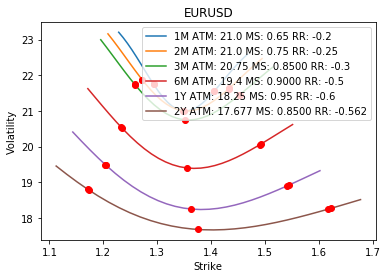

In [14]:
fxMarket.plotVolCurves()

### Extracting Information from Volatility Surface

In [15]:
fxMarket._F0T

array([1.3459262 , 1.34533354, 1.34476024, 1.34300365, 1.33953024,
       1.33258276])

In [16]:
fxMarket._parameters

array([[-1.56039695,  0.02648097,  0.46552906],
       [-1.56017822,  0.03659814,  0.53522015],
       [-1.57191833,  0.04679575,  0.61106926],
       [-1.63829393,  0.07769547,  0.69677565],
       [-1.69812437,  0.10861601,  0.80401999],
       [-1.72842552,  0.1308501 ,  0.81523686]])

We can extract information from the volatility surface

In [17]:
K = 1.4

The zeroth curve is the 1M volatility smile

In [18]:
fxMarket.volFunction(K,0)

0.2145424278517458

The fifth curve is the 2Y volatility smile

In [19]:
fxMarket.volFunction(K,5)

0.17663469125137504

Copyright (c) 2020 Dominic O'Kane